## Find missing data and process
This file aims to process the missing data and save the processed data as csv file

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read raw data
model_sample = pd.read_csv("./data/model_sample.csv")
# dropout id it is user's id
model_sample = model_sample.drop('user_id', axis=1)

#### features missing rate

In [3]:
miss_rate = model_sample.isnull().sum()/len(model_sample)
miss_rate

y        0.000000
x_001    0.002814
x_002    0.002814
x_003    0.000000
x_004    0.000000
x_005    0.000000
x_006    0.000000
x_007    0.000000
x_008    0.000000
x_009    0.000000
x_010    0.000000
x_011    0.000000
x_012    0.000000
x_013    0.000000
x_014    0.000000
x_015    0.000000
x_016    0.000000
x_017    0.000000
x_018    0.000000
x_019    0.000000
x_020    0.000000
x_021    0.000000
x_022    0.000000
x_023    0.000000
x_024    0.000000
x_025    0.000000
x_026    0.000000
x_027    0.000000
x_028    0.000000
x_029    0.000000
           ...   
x_170    0.164382
x_171    0.164382
x_172    0.521739
x_173    0.521739
x_174    0.521739
x_175    0.164382
x_176    0.164382
x_177    0.164382
x_178    0.164382
x_179    0.164382
x_180    0.164382
x_181    0.164382
x_182    0.164382
x_183    0.164382
x_184    0.164382
x_185    0.428973
x_186    0.428973
x_187    0.428973
x_188    0.164382
x_189    0.164382
x_190    0.164382
x_191    0.164382
x_192    0.164382
x_193    0.164382
x_194    0

In [4]:
miss_rate_list = miss_rate[(miss_rate > 0.4)] # select missing feature above 40%
print(len(miss_rate_list))
miss_delete_features = miss_rate_list.index
model_sample = model_sample.drop(miss_delete_features, axis=1) #delete some features
model_sample.tail()

82


,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199
11012,0,0.0,29.0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11013,1,0.0,25.0,0,0,0,0,0,0,0,...,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,7.0,7.0
11014,0,0.0,28.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11015,0,0.0,23.0,0,0,0,0,0,0,0,...,1.0,0.0,3.0,1.0,5.0,1.0,3.0,1.0,7.0,1.0
11016,1,0.0,35.0,0,0,0,0,0,0,0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### look deep into the data

The [`missingno` library](https://github.com/ResidentMario/missingno), which I wrote expressly for this purpose, provides a few further useful expressions for a deeper look into this subject.
There are some useful method to visualize the data. These can be shown as follows:
* Matrix
* Heatmap
* Dendrogram


#### Matrix
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

In [8]:
import missingno as msno
msno.matrix(model_sample.sample(1000))
plt.show()

#### Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

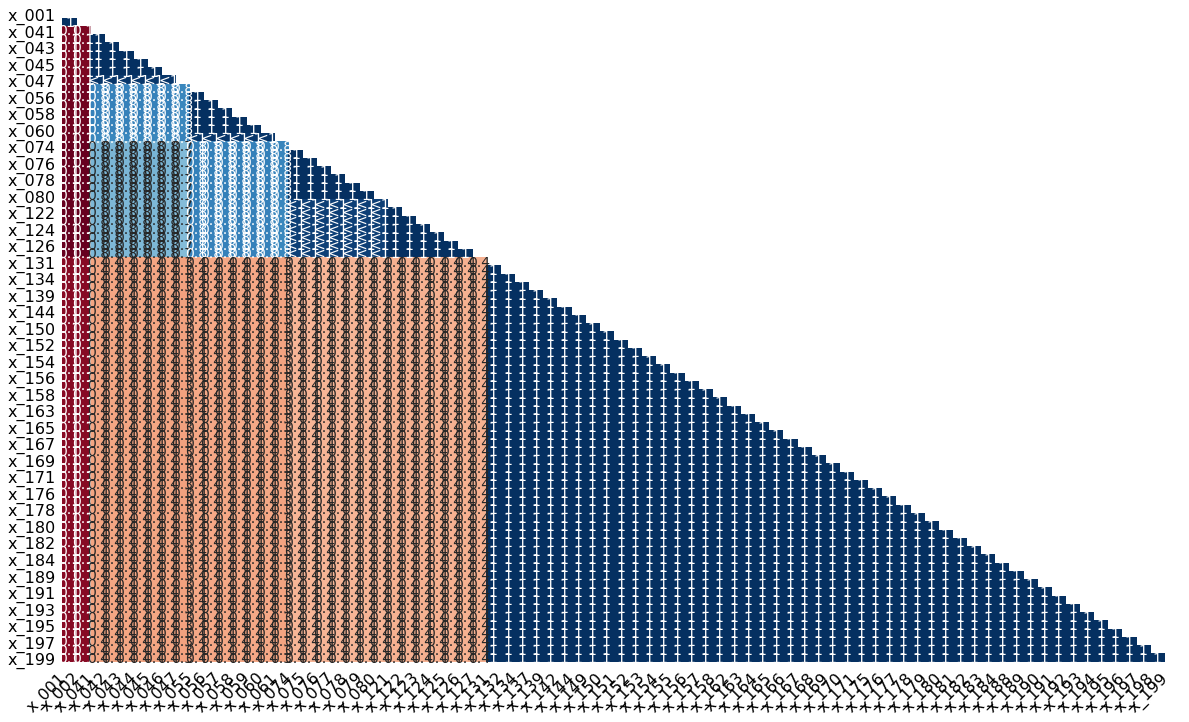

In [91]:
msno.heatmap(model_sample)
plt.show()

#### Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

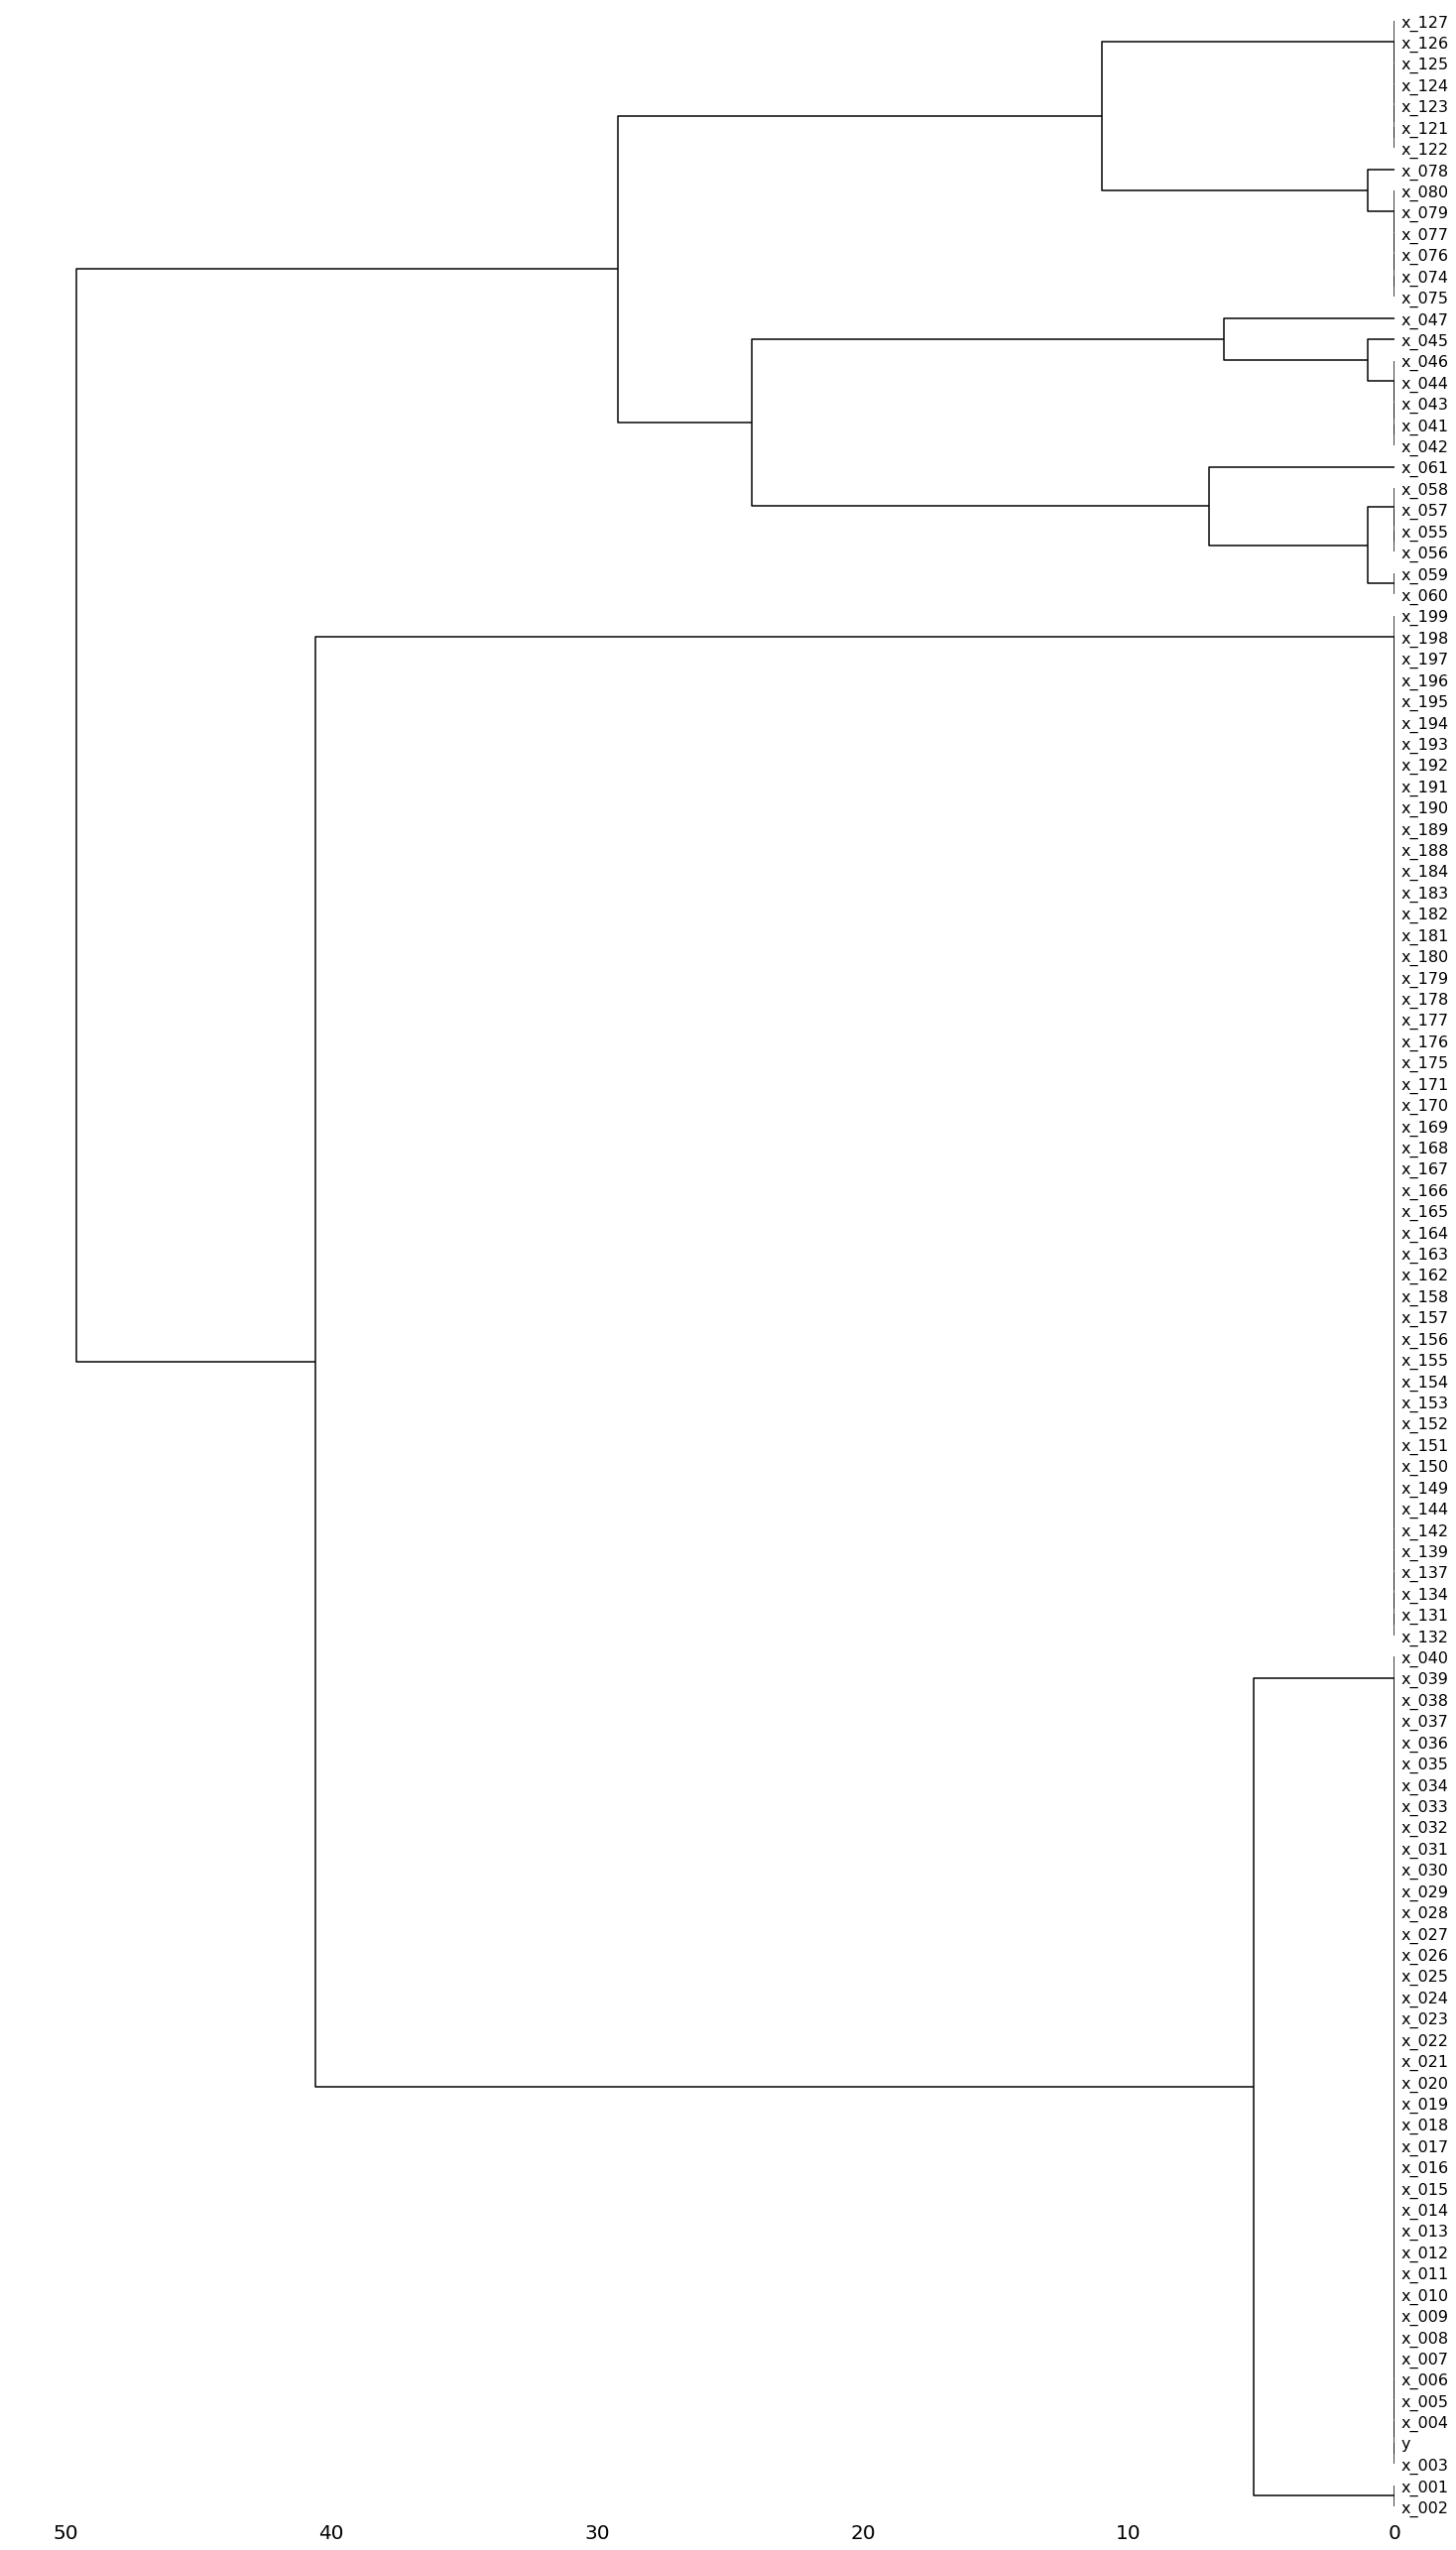

In [74]:
msno.dendrogram(model_sample)
plt.show()

### Conclusion
Missing data mechanisms can be categorized into three types
* missing completely at random (MCAR)
* missing at random (MAR)
* missing not at random (MNAR)

You can check more [missing data](https://en.wikipedia.org/wiki/Missing_data#Types_of_missing_data) from Wikipedia

From the above analysis, we can conclude the data belong to missing not at random (MNAR).That's to say,
I will use techniques related to MNAR to deal with missing data.

### Dealing with Missing Not at Random

* K-Nearest Neighbours
* Multivariate Imputation by Chained Equations
* Expectation Maximization
* Mean Imputation
* Median Imputation
* Random Imputation


[Impyute](https://github.com/eltonlaw/impyute) is a library of missing data imputation algorithms.
Data imputations library  to preprocess datasets with missing data. More infomation you can check the website http://impyute.readthedocs.io/


In [5]:
import impyute as impy
ivalue = model_sample.values
imputed = impy.random(ivalue)

In [6]:
columns_name = model_sample.columns
imputed_sample = pd.DataFrame(imputed,columns=columns_name)
imputed_sample['y'] = imputed_sample['y'].astype(int)
imputed_sample.tail()

,y,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,...,x_190,x_191,x_192,x_193,x_194,x_195,x_196,x_197,x_198,x_199
11012,0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,27.0,10.0,2.0,16.0,7.0,12.0,3.0,67.0,4.0
11013,1,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,5.0,5.0,4.0,4.0,7.0,7.0
11014,0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11015,0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,1.0,5.0,1.0,3.0,1.0,7.0,1.0
11016,1,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [116]:
imputed_sample.to_csv('model_sample_nomissing.csv')

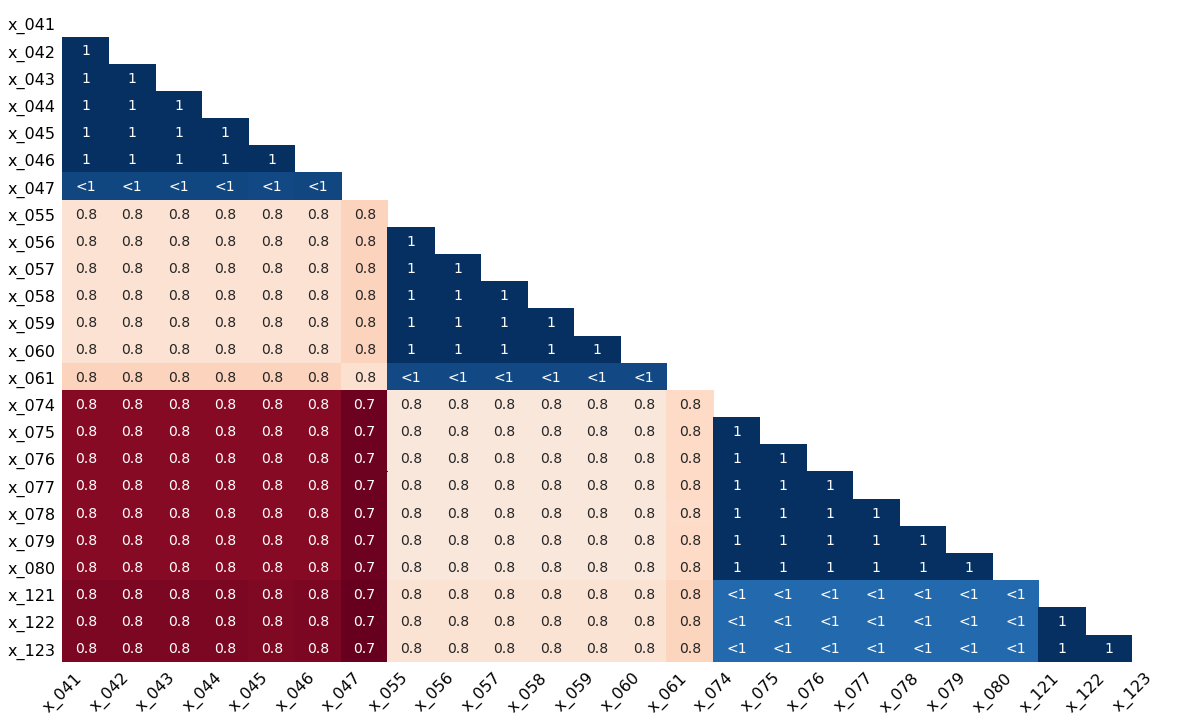

In [9]:
ll = model_sample.columns
some_df = model_sample.loc[:,ll[41:65]]
msno.heatmap(some_df)
plt.show()